In [1]:
import numpy as np
import glob
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Cost function')

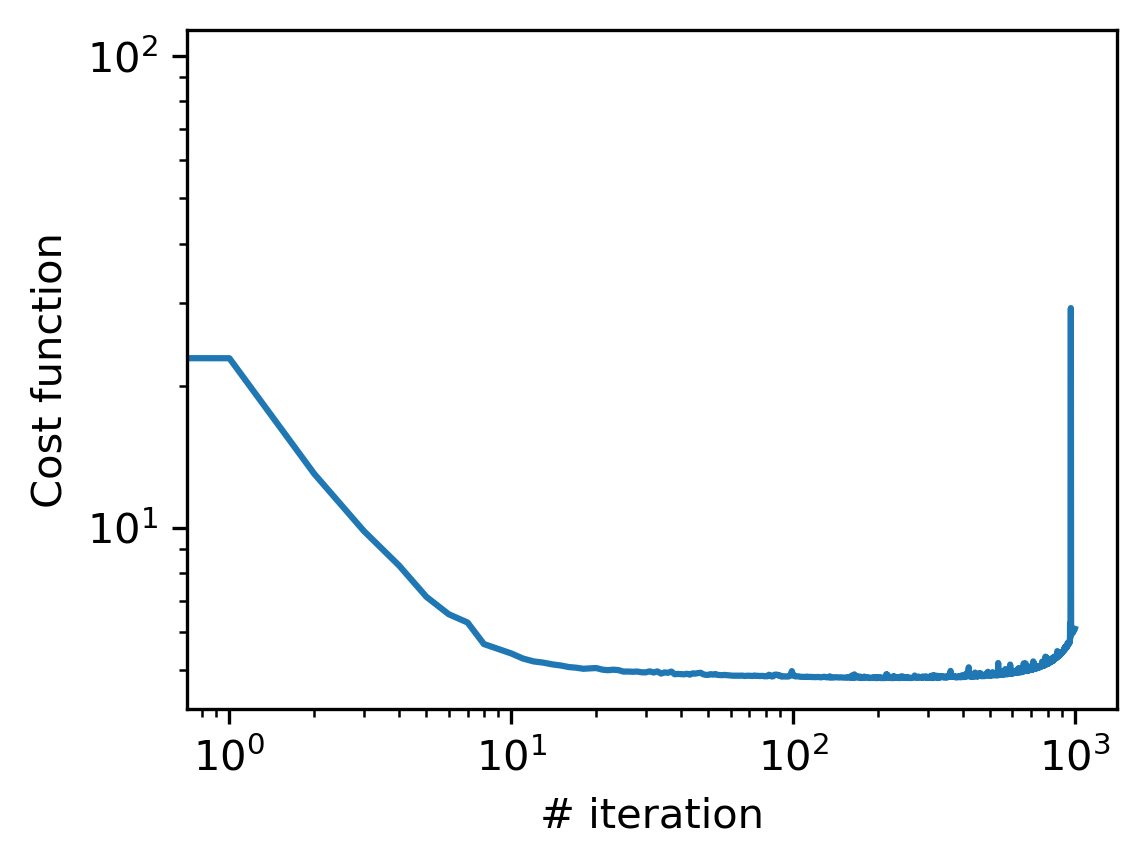

In [7]:
# curves for n2n alternative
gamma = 7.5e-4
beta = 5
prefix = 'alter_os'

files = [
#     '../../train/recon/n2n_2d/converge/%s/patch_img_pre_train/16/loss.npz'%prefix, 
    '../../train/recon/n2n_2d/converge/%s/patch_img_no_pre_train/16/loss.npz'%prefix,
#     '../../train/recon/n2n_2d/converge/%s/whole_img_pre_train/16/loss.npz'%prefix, 
#     '../../train/recon/n2n_2d/converge/%s/patch_img_lbfgs/16/loss.npz'%prefix
        ]

# names = ['Adam', 'Adam (w/o pre)', 'Adam (w/o patch)', 'L-BFGS']

curves = []
for file in files:
    curve = np.load(file)['val']
#     curve = curve[:,1]
    curve = 0.5 * curve[:,0] + 0.5 * gamma * (beta * curve[:,1] + curve[:,2])
#     curve = curve[:,3] * 1000
    curves.append(curve)

plt.figure(figsize=[4,3], dpi=300)
for i in range(len(curves)):
    plt.loglog(range(0, len(curves[i])), curves[i])
# plt.ylim([None, 4e-2])
# plt.legend(names)
plt.xlabel('# iteration')
plt.ylabel('Cost function')
# plt.title('12 OS + Nesterov')

# plt.savefig('../../train/recon/eval/converge_cost_%s.eps'%prefix)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


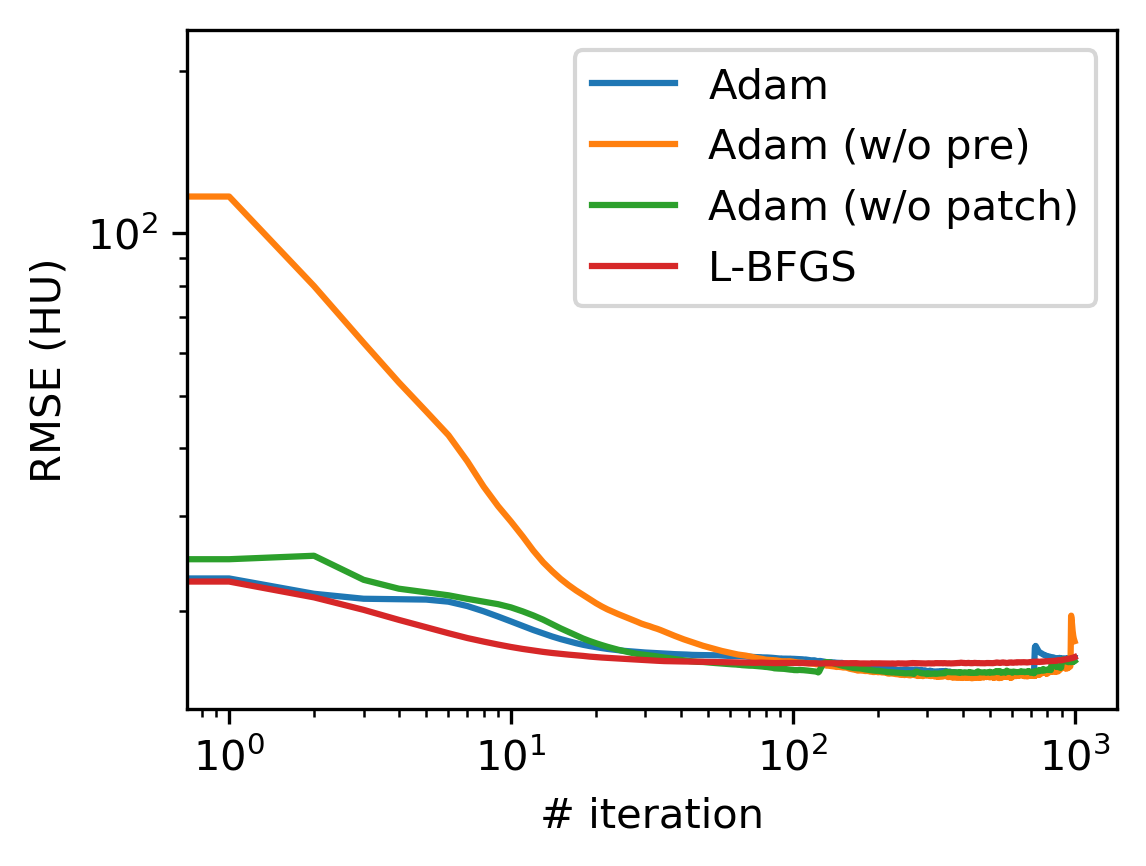

In [7]:
curves = []
for file in files:
    curve = np.load(file)['val']
    curve = curve[:,3] * 1000
    curves.append(curve)

plt.figure(figsize=[4,3], dpi=300)
for i in range(len(curves)):
    plt.loglog(range(0, len(curves[i])), curves[i])
# plt.ylim([None, 4e-2])
plt.legend(names)
plt.xlabel('# iteration')
plt.ylabel('RMSE (HU)')
# plt.title('12 OS + Nesterov')

plt.savefig('../../train/recon/eval/converge_rmse_%s.eps'%prefix)

Text(0.5, 1.0, 'Restricted objective function \n ADMM optimization on whole image')

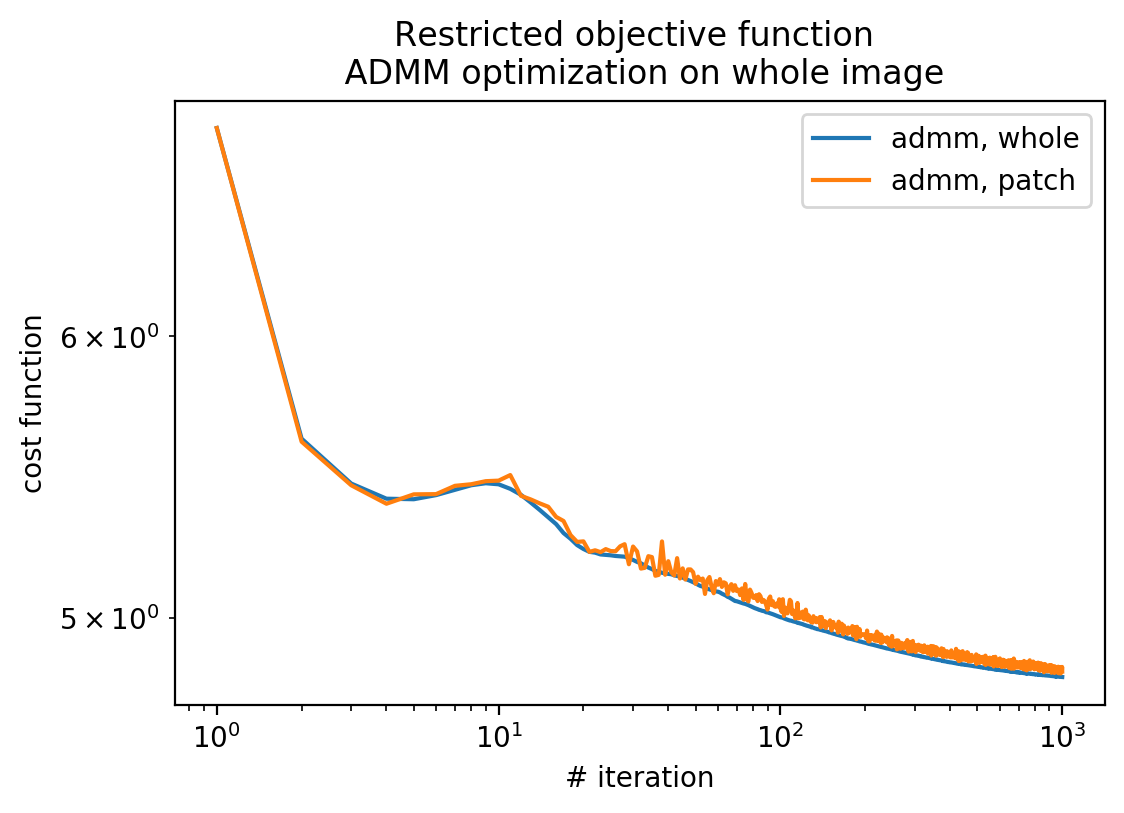

In [39]:
# curves for n2n admm
gamma = 4e-5
files = ['../../train/recon/n2n_2d/converge/admm/whole_img_pre_train/16/loss.npz', 
         '../../train/recon/n2n_2d/converge/admm/patch_img_pre_train/16/loss.npz']

names = ['admm, whole', 'admm, patch']

curves = []
for file in files:
    curve = np.load(file)['val']
    curve = 0.5 * curve[:,0] + 0.5 * gamma * (curve[:,2])
    curves.append(curve)

plt.figure(figsize=[6,4], dpi=200)
for i in range(len(curves)):
    plt.loglog(range(1, 1001), curves[i])
# plt.ylim([2e-2, 3e-2])
plt.legend(names)
plt.xlabel('# iteration')
plt.ylabel('cost function')
plt.title('Restricted objective function \n ADMM optimization on whole image')